# OkCupid: Date-a-Scientist

#### A Machine Learning Portfolio Project (Data provided by CodeCademy)

## Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, I analyzed some data from OkCupid, an app that focuses on using multiple choice and short answers to match users.

## Scoping

For this project, the scope consisted of four steps: project goals, actions and data, analysis, and the evaluation of each step to build conclusions and to communicate findings in a more effective way.

#### 1. Project goals
The goal for this project was to perform Data Analysis with Machine Learning techniques on a dataset of OkCupid provided by CodeCademy. I tried to filled null values on key columns with predictive algorithms using Python library Scikit-Learn, and then I moved on to making predictions about the status of potential new users.

#### 2. Actions and Data
The actions that were made to work toward the goal of the project were the analysis and transformation of the dataset provided by CodeCademy.com, called "Profiles.csv" and Species_info.csv, to get even insightful information and elaborate Machine Learning models.

#### 3. Analysis
The analysis was conducted on these main questions:

- Can I predict the null values for important features of the dataset like a person's diet or religion?
- Is there an efficient way to predict the profile status (availability) for potential new users?
- Am I able to predict if these people logged in in the last 7 days without looking at that information?

#### 4. Evaluation
Finally, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section also reflects on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import the Modules

The first thing to do, was to import the Python Modules to be used in this project.

In [1]:
#To analyze the data
import pandas as pd

#To visualize it
from matplotlib import pyplot as plt

#To divide data into train and test splits
from sklearn.model_selection import train_test_split

#To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Machine Learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#To evaluate the models
from sklearn.metrics import classification_report

## Load the Data

To begin our work, I imported the dataset used to work with.

profiles.csv dataset:

This file contains information from the profiles registered at the Ok-Cupid dating app from mid-2016 to mid-2017.

The columns are the following:

- age: age of user
- body_type: categorical variable of body type of user
- diet: categorical variable of dietary information
- drinks: categorical variable of alcohol consumption
- drugs: categorical variable of drug usage
- education: categorical variable of educational attainment
- essays (1 to 9): titles of the essays each user wanted to upload
- ethnicity: categorical variable of ethnic background
- height: continuous variable of height of user
- income: continuous variable of income of user
- job: categorical variable of employment description
- offspring: categorical variable of children status
- orientation: categorical variable of sexual orientation
- pets: categorical variable of pet preferences
- religion: categorical variable of religious background
- sex: categorical variable of gender
- sign: categorical variable of astrological symbol
- smokes: categorical variable of smoking consumption
- speaks: categorical variable of language spoken
- status: categorical variable of relationship status
- last_online: date variable of last login to the app
- location: categorical variable of the user location

I ran the following code to check some of the rows of the table, and the information of the length the dataset as well as the null values.

In [2]:
df = pd.read_csv("profiles.csv")

df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#The essays columns were not useful for machine learning modules, so I proceeded to take them out of the dataframe.

columns = [c for c in df.columns if c[:5] != 'essay']

df = df[columns].reset_index()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        59946 non-null  int64  
 1   age          59946 non-null  int64  
 2   body_type    54650 non-null  object 
 3   diet         35551 non-null  object 
 4   drinks       56961 non-null  object 
 5   drugs        45866 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  offspring    24385 non-null  object 
 14  orientation  59946 non-null  object 
 15  pets         40025 non-null  object 
 16  religion     39720 non-null  object 
 17  sex          59946 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [5]:
#It was important to see if the columns had a big amount of null values.

df.isna().sum()

index              0
age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

## Analyzing the dataset

There were a lot of categorical columns, and I needed to know if there was a small or large range of answers for a few of them to know what could I do with this information.

In [6]:
#What were the status options for the users? As we can see, most of the dataset is single users.
df.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [7]:
#What about the jobs? Are there too many categories? Still is a little more balanced
df.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

I made a few more analysis, but I did not uploaded here. Instead, the columns I used to work with and its distribution are found and showcased at each Machine Learning process. 

## First question: Can I predict the null values for NaN in drugs?

To asume the answer is yes, the Machine Learning model would have needed to have a high score of accuracy to make myself confident.

Which model was better to use? Naive Bayes? Linear Regression?

In [8]:
# How many null values I had at the column of drugs?
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [9]:
#Then, I made two different datasets: one for users who filled the drug information, and another for users who did not

null_in_drugs = df[df['drugs'].isna()]
filled_in_drugs = df.dropna(subset = ['drugs'])

In [10]:
#The columns selected are for simpler use as an input of the Machine Learning Model.

columns_drugs = filled_in_drugs[['age','drinks','smokes','status','body_type','drugs']]
columns_drugs = columns_drugs.dropna()

In [11]:
#I looked how were the categories of one of the columns selected. As many of them were categorical, I had to turn that
#categorical answers into numbers for the model.

columns_drugs.drinks.value_counts()

socially       28004
rarely          4732
often           3310
not at all      2810
very often       364
desperately      207
Name: drinks, dtype: int64

In [12]:
columns_drugs['drinks'] = columns_drugs['drinks'].map({'not at all': 0,
                                                       'rarely':1, 'socially': 2, 'often': 3,
                                                       'very often': 4, 'desperately': 5})

In [13]:
print(columns_drugs.drinks.value_counts())

2    28004
1     4732
3     3310
0     2810
4      364
5      207
Name: drinks, dtype: int64


In [14]:
#I did the same with other columns

columns_drugs['smokes'] = columns_drugs['smokes'].map({'no': 0,
                                                       'trying to quit': 1, 'when drinking': 2,
                                                       'sometimes': 3, 'yes': 4})

columns_drugs['status'] = columns_drugs['status'].map({'single':0,
                                                       'available': 1, 'seeing someone': 2,
                                                       'unknown': 3, 'married': 4})

# In the status column, 'unknown' was maybe related with a difuse situation, so it was placed just before married

columns_drugs['body_type'] = columns_drugs['body_type'].map({'thin':0,'skinny':1,'fit':2,'athletic':3,
                                                             'jacked':4,'rather not say':5,'average':6,
                                                             'a little extra':7,'used up':8,'curvy':9,'overweight':10,
                                                             'full figured':11})

#Now, the table looked like this:
columns_drugs.head()

,age,drinks,smokes,status,body_type,drugs
0,22,2,3,0,7,never
1,35,3,0,0,6,sometimes
4,29,2,0,0,3,never
7,31,2,0,0,6,never
9,37,0,0,0,3,never


In [15]:
#Standardize and preprocess the column numbers for the models:

train_data_drugs,test_data_drugs, train_labels_drugs, test_labels_drugs = train_test_split(columns_drugs[['age','drinks','smokes','status','body_type']],
                                                                   columns_drugs['drugs'],test_size = 0.2, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler_drugs = StandardScaler()
train_features_drugs = scaler_drugs.fit_transform(train_data_drugs)
test_features_drugs = scaler_drugs.transform(test_data_drugs)

In [16]:
#Now, with the Logistic Regression model, I will see if the machine can predict the test data in a succesful way.

from sklearn.linear_model import LogisticRegression
model_drugs = LogisticRegression()
model_drugs.fit(train_features_drugs,train_labels_drugs)
print(model_drugs.score(test_features_drugs, test_labels_drugs))

0.829190971341618


I saw that an 82% accuracy is a really good value. But still I needed to evaluate the model to see which were the outcomes.

The first thing to do was to check if each variable had a high impact on the model outcome.

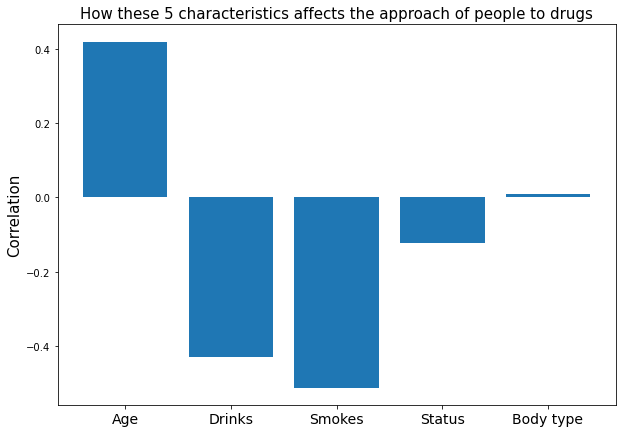

In [17]:
coefficients = model_drugs.coef_
coeflist = coefficients.tolist()[0]

from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
ax = plt.subplot()
plt.bar(range(len(coeflist)), coeflist)
ax.set_xticks(range(len(coeflist)))
ax.set_xticklabels(["Age","Drinks","Smokes","Status","Body type"], size = 14)
plt.ylabel("Correlation", size = 15)
plt.title("How these 5 characteristics affects the approach of people to drugs", size = 15)
plt.show()

I could see that the 3rd coefficient (smoke) has more impact on this classification. Also, the last ones (status and body type) had almost any effects.

So I made an alternative model that did take the body type as a variable.

In [18]:
columns_drugs_no_body = columns_drugs[['age','drinks','smokes','status','drugs']]

train_data_drugs1,test_data_drugs1, train_labels_drugs1, test_labels_drugs1 = train_test_split(columns_drugs_no_body[['age','drinks','smokes','status']],
                                                                   columns_drugs['drugs'],test_size = 0.2, random_state = 400)

from sklearn.preprocessing import StandardScaler
scaler_drugs1 = StandardScaler()
train_features_drugs1 = scaler_drugs1.fit_transform(train_data_drugs1)
test_features_drugs1 = scaler_drugs1.transform(test_data_drugs1)

model_drugs1 = LogisticRegression()
model_drugs1.fit(train_features_drugs1,train_labels_drugs1)
print(model_drugs1.score(test_features_drugs1, test_labels_drugs1))

0.8379406543241187


It was a small progress, but still I could take this model and try to predict the drugs information for the people that had not provided that information.

In [19]:
null_in_drugs = null_in_drugs.dropna(subset = ['age','drinks','smokes','status'])
null_in_drugs['drinks'] = null_in_drugs['drinks'].map({'not at all': 0,
                                                       'rarely':1, 'socially': 2, 'often': 3, 'very often': 4,
                                                       'desperately': 5})
null_in_drugs['smokes'] = null_in_drugs['smokes'].map({'no': 0,
                                                       'trying to quit': 1, 'when drinking': 2,
                                                       'sometimes': 3, 'yes': 4})
null_in_drugs['status'] = null_in_drugs['status'].map({'single':0,
                                                       'available': 1, 'seeing someone': 2,
                                                       'unknown': 3, 'married': 4})
null_in_drugs_columns = null_in_drugs[['age','drinks','smokes','status']]

test_features_drugs2 = scaler_drugs1.transform(null_in_drugs_columns)
predictions_drugs = model_drugs1.predict(test_features_drugs2)

Still, I did not know how many of the drugs information were predicted. That is what I looked for next.

In [20]:
never_predicted = 0
sometimes_predicted = 0
often_predicted = 0
error = 0

for i in predictions_drugs:
    if i == 'never':
        never_predicted +=1
    elif i == 'sometimes':
        sometimes_predicted +=1
    elif i == 'often':
        often_predicted +=1
    else:
        error +=1
        
print("Never do drugs predicted: " + str(never_predicted))
print("Sometimes do drugs predicted: " + str(sometimes_predicted))
print("Often do drugs predicted: " + str(often_predicted))
print("errors: " + str(error))

Never do drugs predicted: 10259
Sometimes do drugs predicted: 648
Often do drugs predicted: 0
errors: 0


As we saw before, the low amount of users who chose "often" to describe its approach to drug usage, was reflected in the Machine Learning Model, which did not return any result of this type. However, it is still a high accuracy model.

## Second question: Can I predict income values, as there are so many users that did not disclose this information?

To asume the answer is yes, the Machine Learning model would have needed to have a high score of accuracy to make myself confident.

#Use this columns: body_type, ethnicity, last_online, orientation, age
#MODEL: K Nearest Neighbors? Support Vector Machines?

In [21]:
#I inspected this information, only to find out that the -1 value (not given by the user) was incredibly high.

df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [22]:
#After creating the two tables, I had to asign categorical answers a numeric value for the machine learning model.

income_known = df[df.income != -1]
income_not_known = df[df.income == -1]

income_known_full = income_known.dropna(subset = ['age','education','job','pets',
                                                  'status','drinks','religion','income']).reset_index()

from sklearn.preprocessing import LabelEncoder
education_encoder = LabelEncoder()
job_encoder = LabelEncoder()
pets_encoder = LabelEncoder()
status_encoder = LabelEncoder()
drinks_encoder = LabelEncoder()
religion_encoder =LabelEncoder()

educcc = education_encoder.fit_transform(income_known_full.education)
jobbb = job_encoder.fit_transform(income_known_full.job)
petsss = pets_encoder.fit_transform(income_known_full.pets)
statusss = status_encoder.fit_transform(income_known_full.status)
drinksss = drinks_encoder.fit_transform(income_known_full.drinks)
religionnn = religion_encoder.fit_transform(income_known_full.religion)

income_known_full['educationenc']=pd.Series(educcc)
income_known_full['jobenc']=pd.Series(jobbb)
income_known_full['petsenc']=pd.Series(petsss)
income_known_full['statusenc']=pd.Series(statusss)
income_known_full['drinksenc']=pd.Series(drinksss)
income_known_full['religionenc']=pd.Series(religionnn)

income_known_full.petsenc.value_counts()

14    2712
11     840
13     771
6      514
9      468
12     369
8      327
5      235
10     169
7      118
4       86
2       46
3       37
0       14
1       10
Name: petsenc, dtype: int64

In [23]:
train_data_income, test_data_income, train_labels_income, test_labels_income = train_test_split(income_known_full[['age','educationenc','jobenc',
                                                                                           'petsenc','statusenc', 'drinksenc',
                                                                                           'religionenc']], 
                                                                        income_known_full[['income']],
                                                                        test_size = 0.2, random_state = 100)

results = []
for k in range(1,20):
    classifier = RandomForestClassifier(n_estimators = k)
    classifier.fit(train_data_income,train_labels_income.values.ravel())
    results.append(classifier.score(test_data_income,test_labels_income))

results

[0.24553571428571427,
 0.2760416666666667,
 0.3005952380952381,
 0.31026785714285715,
 0.28869047619047616,
 0.3162202380952381,
 0.3117559523809524,
 0.3087797619047619,
 0.3162202380952381,
 0.31398809523809523,
 0.31994047619047616,
 0.3273809523809524,
 0.30505952380952384,
 0.3236607142857143,
 0.33110119047619047,
 0.32514880952380953,
 0.3229166666666667,
 0.33630952380952384,
 0.3132440476190476]

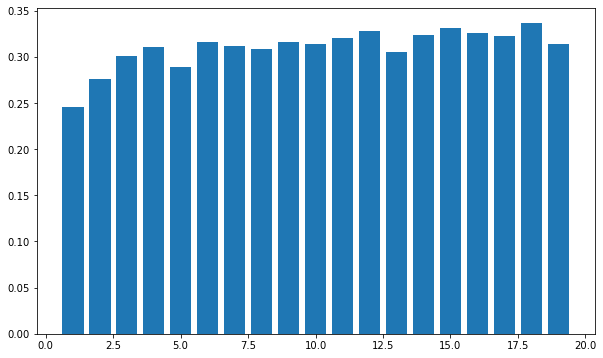

In [24]:
ax = plt.figure(figsize = (10,6))
plt.bar(range(1,20), results)
plt.show()

In this graph, I came to the conclusion that the model was not useful for predictions, as the accuracy is always below 40% no matter how many neighbors we apply to it.

## Third question: Can I predict the sex of the users based on age and body type?

To asume the answer is yes, the Machine Learning model would have needed to have a high score of accuracy to make myself confident.

Which model was better to use? K-Neighbors? Naive Bayes? Random Forests?

In [25]:
#The age and body type were already inspected. How about the sex distribution?

df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [26]:
sexdf= df[['age','sex','job','body_type']].reset_index()
sexdf['sex'] = sexdf['sex'].map({'f':0,'m':1})
sexdf = sexdf.dropna()

job_encoder = LabelEncoder()
sexdf['job'] = job_encoder.fit_transform(sexdf['job'])
sexdf['body_type'] = sexdf['body_type'].map({'thin':0,'skinny':1,'fit':2,'athletic':3,
                                                             'jacked':4,'rather not say':5,'average':6,
                                                             'a little extra':7,'used up':8,'curvy':9,'overweight':10,
                                                             'full figured':11})

x_train_sex, x_test_sex, y_train_sex, y_test_sex = train_test_split(sexdf[['age','job','body_type']],sexdf['sex'], test_size = 0.2, random_state = 100)

sex_scores = []
for i in range(1,20):
    smodel = KNeighborsClassifier(n_neighbors = i)
    smodel.fit(x_train_sex,y_train_sex)
    sex_scores.append(smodel.score(x_test_sex,y_test_sex))
sex_scores

[0.6535202427032116,
 0.6037242389371273,
 0.6692122606967256,
 0.6471388220525159,
 0.6788366983994142,
 0.66293545349932,
 0.6844858248770792,
 0.6728737315618789,
 0.6918087666073857,
 0.6834396903441783,
 0.693168741500157,
 0.6849042786902395,
 0.6959933047389895,
 0.6933779684067372,
 0.7007009101370436,
 0.6967255989120201,
 0.7016424312166545,
 0.6974578930850507,
 0.7001778428705931]

As it approached to 20 nearest neighbors, the model went up to 70% of accuracy, which was good number to say it was effective.
But I tried other models to see if I got a higher level of accuracy.  

In [27]:
smodel1 = MultinomialNB()
smodel1.fit(x_train_sex, y_train_sex)
smodel1.score(x_test_sex, y_test_sex)

0.6473480489590961

The Naive Bayes Classifier had not better results. It were almost 65%. I proceeded to make one more model, with the random forest algorithm.

In [28]:
sresults = []
for i in range(1,10):
    sclassifier = RandomForestClassifier(n_estimators = i, random_state = 50)
    sclassifier.fit(x_train_sex, y_train_sex)
    predictions = sclassifier.predict(x_test_sex)
    sresults.append(sclassifier.score(x_test_sex,y_test_sex))
    
sresults

[0.6915995397008056,
 0.6945287163929281,
 0.6980855738047913,
 0.6993409352442724,
 0.7019562715765247,
 0.7012239774034941,
 0.7008055235903338,
 0.6998640025107229,
 0.6994455486975625]

In [29]:
#Here, we can se the evaluation of this model

evalclassifier = RandomForestClassifier(n_estimators = 5, random_state = 50)
evalclassifier.fit(x_train_sex, y_train_sex)
predictions = evalclassifier.predict(x_test_sex)
print(classification_report(y_test_sex, predictions))

              precision    recall  f1-score   support

           0       0.66      0.48      0.55      3686
           1       0.72      0.84      0.78      5873

    accuracy                           0.70      9559
   macro avg       0.69      0.66      0.66      9559
weighted avg       0.70      0.70      0.69      9559



With 5 decision trees, the random forest throws a 70.19% accuracy, which is by little better than the K-Neighbors classifier.

## Evaluations and Conclusion

All the analysis done led me to the following findings:

- An accurate model can be built to predict the drug usage variable for people who did not want to disclose that personal information. However, as almost all of the users did not chose "often" to answer, the model did not predict any "often" value.
- It is not recommended to predict the income of the users with categorical information containing a lot of options, as the model would not have a high level of accuracy.
- An accurate model can be built to predict the gender of an user based on their age, body type and job. It reaches 70% of accuracy, and it do not appears to have any major disadvantages.